# Código para figuras com Vento e Temperatura
## (Arrow Plot)

Carregar arquivo para plotar figuras com temperatura e vento. O objetivo é exemplificar o efeito do vento preferencial que pode movimentar partículas para Piracicaba.

In [54]:
import pandas as pd
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import seaborn as sns
import datetime as dt
%matplotlib inline

## *Entradas*
* Selecionar arquivos de origem para preparar figuras.
* Inicializar variáveis para figuras.

### Parametrização dos arquivos de entrada

Ajustar diretório que contem os arquivos, nomes de rodadas, e shapefiles a serem plotados

In [55]:
directory = str('E:/Mestrado/1.Resultados/Meteorologia/')
mes   = ['jan','jul']
grade = ['d01','d02','d03','d04']
data  = ['01-09','07-24']
modelagens = ['andrade2015','pedruzzi2016','pedruzzi2016_nudge','silvajunior2009']
shapes = ['pirashape','RMSP']

mes_sel   = mes[1] 
grade_sel = grade[0]
modelagens_sel = modelagens[2]

# Gráficos de Vento (*arrow plot*)

## *Saídas* 
* Média de vento por dias e por intervalo, para gráficos múltiplos

### Parametrização das figuras de saída
Ajustar número de figuras e tamanho de figura a ser elaborada.

In [57]:
data_sel  = data[mes.index(mes_sel)]
nc_rodada = Dataset(directory+'arqWRF/'+mes_sel+'/wrf_fnl_pira_'+modelagens_sel+'_'+mes_sel+'/wrfout_'+grade_sel+'_2015-'+data_sel+'_00%3A00%3A00')

In [58]:
lats     = nc_rodada.variables['XLAT'][0,:,:]
long     = nc_rodada.variables['XLONG'][0,:,:]
spinup   = int(48)
gmt = 3
time_i   = dt.datetime.strptime(nc_rodada.START_DATE,'%Y-%m-%d_%H:%M:%S')+dt.timedelta(hours=(spinup+gmt))
time_f   = time_i+dt.timedelta(hours=(7*24))

avgdays  = int(7)
interval = int(4)
llvl = 0
hlvl = 40
cols = 3
rows = 2
spacing = 2

D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:53: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:54: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:69: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\Users\50033096\AppData\Local\Continuum\anacon

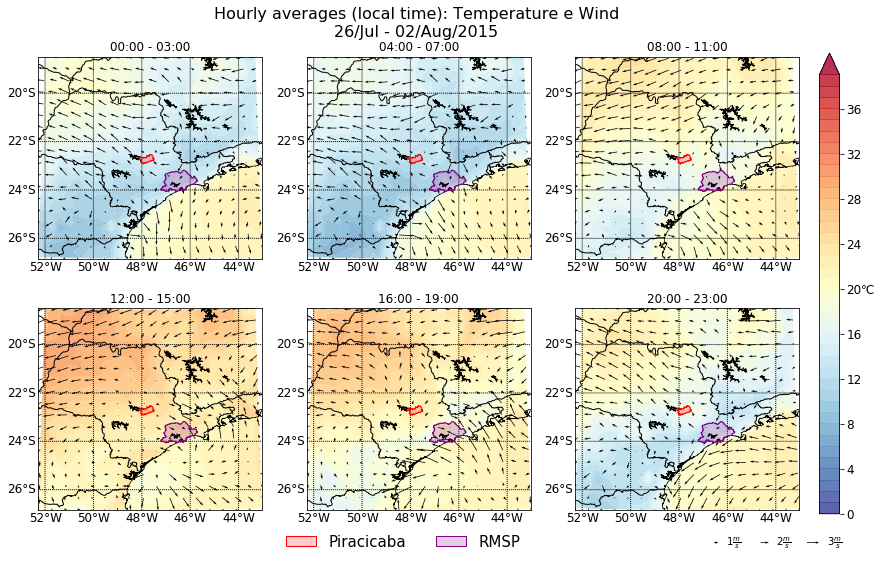

In [59]:
tstep_i  = spinup + gmt
numfig = int(24/interval)
hour_i = time_i - dt.timedelta(hours=gmt)
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(14,8)) #12,14 for vertical
for f in range(0,numfig):
# PLOT TEMPERATURE
    avgtemp = np.zeros((nc_rodada.dimensions['west_east'].size,nc_rodada.dimensions['south_north'].size))
    for i in range(0,avgdays):
        for j in range(0,interval):
            avgtemp += nc_rodada.variables['T2'][int(tstep_i+(i*24)+j),:,:]
    avgtemp /= (interval*avgdays)
    avgtemp -= 273.15
    t_unit = ' \u2103'
    lvl = np.arange(llvl,hlvl)
    map = Basemap(epsg=4326,                 #EPSG code defining projection 
                llcrnrlon=np.min(long),      #longitude of lower left hand corner of the selected map domain.
                llcrnrlat=np.min(lats),      #latitude of upper right hand corner of the desired map domain (degrees).
                urcrnrlon=np.max(long),      #longitude of upper right hand corner of the selected map domain.
                urcrnrlat=np.max(lats),      #latitude of upper right hand corner of the selected map domain.
                resolution='h',              #resolution of boundary dataset being used (c for crude, l for low, etc.). If None, no boundary dataset is associated with the Basemap instance.
                projection='lambert',        #map projection. Print the module variable supported_projections to see a list of allowed values
                ellps = 'WGS84',             #string describing ellipsoid (‘GRS80’ or ‘WGS84’, for example). If both rsphere and ellps are given, rsphere is ignored. Default None. See pyproj.pj_ellps for allowed values.
                lat_0=lats.mean(),           #center of desired map domain (in degrees). 
                lon_0=long.mean(),           #center of desired map domain (in degrees).
                ax=ax.flat[f])           
    tempplot = map.contourf(long,             #X specify the (x) coordinates of the surface
                        lats,                 #Y specify the (y) coordinates of the surface
                        np.squeeze(avgtemp), 
                        antialiased = True,
                        cmap=plt.cm.RdYlBu_r, 
                        vmin=llvl, 
                        vmax=hlvl, 
                        levels=lvl,
                        extend='max',
                        alpha=0.8)
# PLOT WIND QUIVER
    avgu10 = np.zeros((nc_rodada.dimensions['west_east'].size,nc_rodada.dimensions['south_north'].size))
    for i in range(0,avgdays):
        for j in range(0,interval):
            avgu10 += nc_rodada.variables['U10'][int(tstep_i+(i*24)+j),:,:]
    avgu10 /= (interval*avgdays)
    avgv10 = np.zeros((nc_rodada.dimensions['west_east'].size,nc_rodada.dimensions['south_north'].size))
    for i in range(0,avgdays):
        for j in range(0,interval):
            avgv10 += nc_rodada.variables['V10'][int(tstep_i+(i*24)+j),:,:]
    avgv10 /= (interval*avgdays)
    quiverplot = ax.flat[f].quiver(long[::spacing,::spacing],lats[::spacing,::spacing],
                      avgu10[::spacing,::spacing],avgv10[::spacing,::spacing])
    #ax.flat[f].quiverkey
# PLOT CONTOURS AND RASTER
    #map.arcgisimage(verbose= True)                                            #PLot Coastlines, States, and Country Boundaries
    map.drawcoastlines(linewidth=0.75)
    map.drawcountries(linewidth=1.0)
    map.drawstates(linewidth=1.0)
    #map.drawmapboundary(fill_color='aqua')
    #map.bluemarble()
    #map.shadedrelief()
    #map.drawmapboundary(fill_color='aqua')
    #map.fillcontinents(color='coral',lake_color='aqua')
    #map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') 
# PLOT POINTS
    #for p in points:
    #    plot_point(p,'o','r')                                                  #Plot points
# PLOT SHAPEFILES
    # ADD SHAPES
    shps = ['Piracicaba', 'RMSP']
    colors= {'Piracicaba':'red', 'RMSP':'purple'}
    shapes = {}
    map.readshapefile(directory+'arqShape/pirashape', 'Piracicaba', drawbounds = False)
    p = Polygon(np.array(map.Piracicaba)[0,:,:], True, 
                facecolor=(1.0, 0.0, 0.0, 0.2), 
                edgecolor=(1.0, 0.0, 0.0, 1.0), 
                linewidth=1.0, zorder=2)
    shapes[shps[0]] = p
    map.readshapefile(directory+'arqShape/RMSP_3', 'RMSP', drawbounds = False, linewidth=1.0)
    p = Polygon(np.array(map.RMSP[13]), True, 
                facecolor=(0.5019607843137255, 0.0, 0.5019607843137255, 0.2), 
                edgecolor=(0.5019607843137255, 0.0, 0.5019607843137255, 1.0), 
                linewidth=1.0, zorder=2)
    shapes[shps[1]] = p
    # shape names and legend
    for shp in shps:
        ax.flat[f].add_artist(shapes[shp])  
# PARALLELS AND MERIDIANS
    map.drawparallels(np.arange(-80., 81., 2), labels=[1,0,0,0], fontsize=12)       
    map.drawmeridians(np.arange(-180., 181., 2), labels=[0,0,0,1], fontsize=12)
# TITLE FOR SUBPLOTS
    hour_f = hour_i + dt.timedelta(hours=interval-1)
    ax.flat[f].set_title(hour_i.strftime('%H:%M')+' - '+hour_f.strftime('%H:%M'))
    hour_i += dt.timedelta(hours=interval)
# LOOP FOR NEXT PLOT TIME
    tstep_i += interval

# ADJUST PLOT
fig.suptitle('Hourly averages (local time): Temperature e Wind\n'+time_i.strftime('%d/%b')+' - '+
             time_f.strftime('%d/%b/%Y'),fontsize=16) 
plt.subplots_adjust(bottom=0.1, right=0.88, top=0.9)
cax = plt.axes([0.9, 0.1, 0.02, 0.8]) #left, bottom, width, height

# LEGEND
# create legend, by first getting the already present handles, labels
handles, labels = plt.gca().get_legend_handles_labels()
# and then adding the new ones
handles.extend([shapes[shp] for shp in shps])  
labels.extend(shps)          

# Shrink current axis's height by 10% on the bottom
#box = fig.get_position()
#fig.set_position([box.x0, box.y0 + box.height * 0.1,
#                 box.width, box.height * 0.9])
fig.legend(handles=handles, labels=labels, framealpha=1., loc='upper center', 
           ncol=2, fontsize=15, frameon=False,
           bbox_to_anchor=(0.4,0.08))

#QuiverKeys
cax.quiverkey(quiverplot, 0.90, 0.05, 3, r'$3 \frac{m}{s}$', labelpos='E', coordinates='figure')
cax.quiverkey(quiverplot, 0.85, 0.05, 2, r'$2 \frac{m}{s}$', labelpos='E', coordinates='figure')
cax.quiverkey(quiverplot, 0.80, 0.05, 1, r'$1 \frac{m}{s}$', labelpos='E', coordinates='figure')

# COLORBAR
cbar = fig.colorbar(tempplot, cax=cax) # Plot Colorbar
cbar.set_label(t_unit, fontsize = 12, rotation=0)
cbar.ax.tick_params(labelsize = 12)

In [ ]:
avgu10_df = pd.DataFrame(avgu10)

In [ ]:
type(avgu10)

In [52]:
np.shape(avgu10[::2,::2])

(18, 18)